<a href="https://colab.research.google.com/github/NicolasCoiado/nivel-mar/blob/main/nivel_mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/NicolasCoiado/nivel-mar/refs/heads/main/sealvl.csv'
sealvl = pd.read_csv(url)

sealvl["GMSL"] = pd.to_numeric(sealvl['GMSL'], errors='coerce')
sealvl["GMSL uncertainty"] = pd.to_numeric(sealvl['GMSL uncertainty'], errors='coerce')
sealvl['Time'] = pd.to_datetime(sealvl['Time'])
sealvl.dropna(inplace=True)

In [3]:
def gmsl_difference(df):
    first_gmsl = df['GMSL'].iloc[0]
    last_gmsl = df['GMSL'].iloc[-1]
    delta_gmsl = abs(first_gmsl - last_gmsl)
    print('A diferença entre a primeira e a última medição é de:', delta_gmsl)
    return delta_gmsl

In [4]:
def avg_rate_sea(df):
  delta_gmsl = gmsl_difference(df)
  delta_time = (df['Time'].iloc[-1] - sealvl['Time'].iloc[0]).days / 365.25
  avg_rate = round(delta_gmsl / delta_time, 1)
  print('A taxa média de elevação do nível do mar é de: ', avg_rate)
  return avg_rate

In [5]:
def plot_graph_sea(df):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Time'], df['GMSL'], label="GMSL", color='blue')
  plt.title("Nível do Mar (GMSL)")
  plt.xlabel("Ano")
  plt.ylabel("GMSL (mm)")
  plt.legend()
  plt.grid(True)
  plt.show()

In [6]:
def get_max_uncertainty(df):
  max_uncertainty = df['GMSL uncertainty'].max()
  filtered_data = df[df['GMSL uncertainty'] == max_uncertainty]
  corresponding_dates = filtered_data[['Time', 'GMSL uncertainty']]
  return corresponding_dates

In [7]:
def get_min_uncertainty(df):
  min_uncertainty = df['GMSL uncertainty'].min()
  filtered_data = df[df['GMSL uncertainty'] == min_uncertainty]
  corresponding_dates = filtered_data[['Time', 'GMSL uncertainty']]
  return corresponding_dates

In [8]:
def get_max_gmsl(df):
  max_gmsl = df['GMSL'].max()
  filtered_data = df[df['GMSL'] == max_gmsl]
  corresponding_dates = filtered_data[['Time', 'GMSL']]
  return corresponding_dates

In [9]:
def get_min_gmsl(df):
  min_gmsl = df['GMSL'].min()
  filtered_data = df[df['GMSL'] == min_gmsl]
  corresponding_dates = filtered_data[['Time', 'GMSL']]
  return corresponding_dates

In [10]:
def linear_regression(df):
    min_date = df['Time'].min()
    df['Days'] = (df['Time'] - min_date).dt.total_seconds()

    X = df[['Days']]
    y = df['GMSL']

    model = LinearRegression()
    model.fit(X, y)
    trend_line = model.predict(X)

    return df['Time'], df['GMSL'], trend_line

In [11]:
def plot_linear_gmsl(dates, gmsl, trend_line):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, gmsl, label='Dados Históricos', color='paleturquoise')
    plt.plot(dates, trend_line, label='Tendência Linear', color='darkcyan', linestyle='--')
    plt.title('Regressão Linear do Nível do Mar (GMSL)')
    plt.xlabel('Data')
    plt.ylabel('GMSL (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def linear_regression_post_2000(df):
    data_corte = pd.to_datetime("2000-01-01")
    df_2k = df[df['Time'] > data_corte][['Time', 'GMSL', 'GMSL uncertainty']]
    min_date = df_2k['Time'].min()
    df_2k['Days'] = (df_2k['Time'] - min_date).dt.total_seconds()
    X = df_2k[['Days']]
    y = df_2k['GMSL']
    dates = df_2k['Time']  # Extrair as datas para o eixo X

    model = LinearRegression()
    model.fit(X, y)
    trend_line = model.predict(X)

    return X, y, trend_line, dates  # Incluindo as datas no retorno

In [13]:
def plot_linear_gmsl2k(X, y, trend_line, dates):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, y, color='blue', label='Dados Reais')  # Usando as datas no eixo X
    plt.plot(dates, trend_line, color='red', label='Linha de Regressão')  # Usando as datas no eixo X para a linha de tendência
    plt.legend()
    plt.grid(True)
    plt.xlabel('Ano')
    plt.ylabel('GMSL (mm)')
    plt.title('Regressão Linear do Nível do Mar (pós-2000)')
    plt.show()

A diferença entre a primeira e a última medição é de: 241.5
A taxa média de elevação do nível do mar é de:  1.8


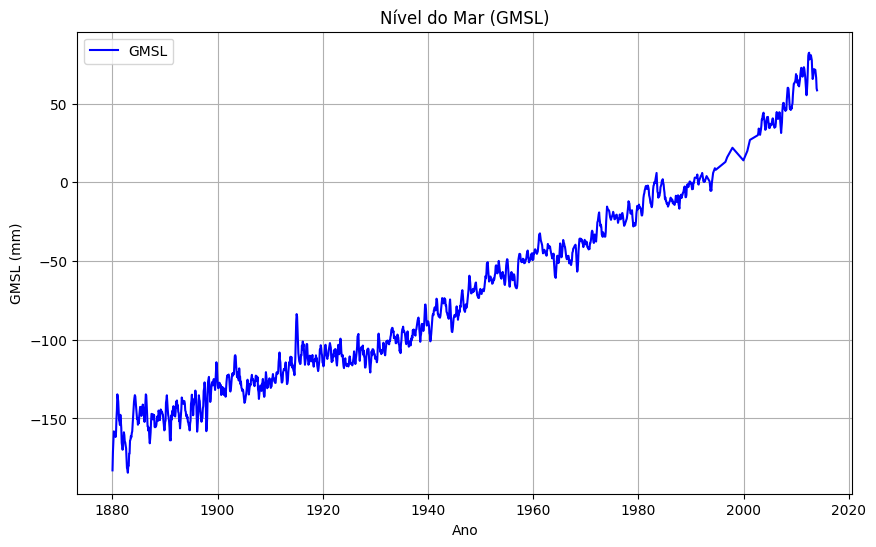

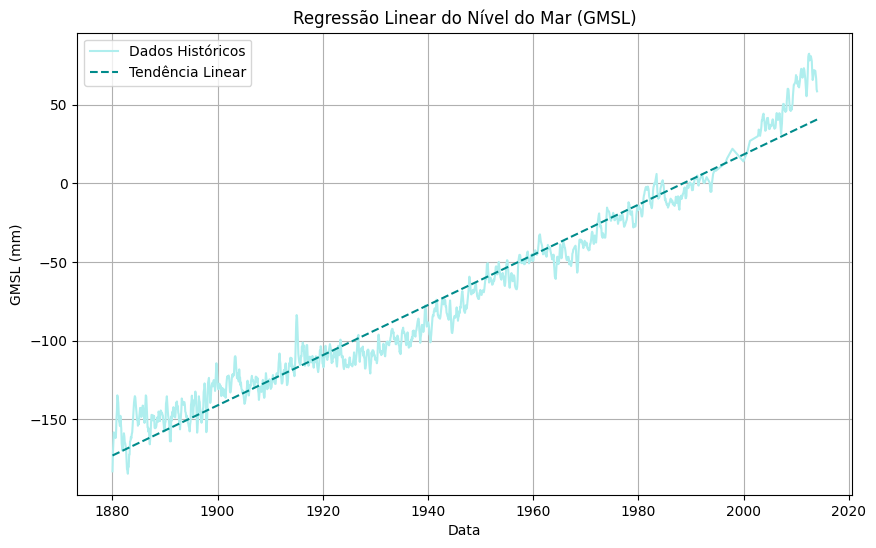

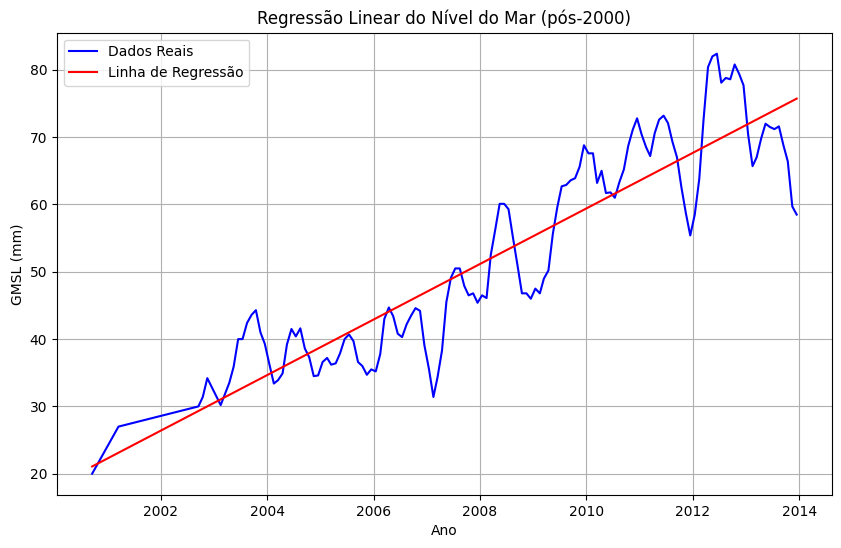

In [14]:
avg_rate_sea (sealvl)
plot_graph_sea(sealvl)
get_max_uncertainty(sealvl)
get_min_uncertainty(sealvl)
get_max_gmsl(sealvl)
get_min_gmsl(sealvl)

X, y, trend_line = linear_regression(sealvl)
plot_linear_gmsl(X, y, trend_line)

X, y, trend_line, dates = linear_regression_post_2000(sealvl)
plot_linear_gmsl2k(X, y, trend_line, dates)